[https://www.kaggle.com/datasets/tunguz/big-five-personality-test/]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from math import pi
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("data-final.csv", delimiter="\t")
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
df.isna().sum()

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
                         ... 
endelapse                   0
IPC                         0
country                    77
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64

In [4]:
questions = df.iloc[:, :50]

In [5]:
questions = questions.fillna(0)
questions.isna().sum()

EXT1     0
EXT2     0
EXT3     0
EXT4     0
EXT5     0
EXT6     0
EXT7     0
EXT8     0
EXT9     0
EXT10    0
EST1     0
EST2     0
EST3     0
EST4     0
EST5     0
EST6     0
EST7     0
EST8     0
EST9     0
EST10    0
AGR1     0
AGR2     0
AGR3     0
AGR4     0
AGR5     0
AGR6     0
AGR7     0
AGR8     0
AGR9     0
AGR10    0
CSN1     0
CSN2     0
CSN3     0
CSN4     0
CSN5     0
CSN6     0
CSN7     0
CSN8     0
CSN9     0
CSN10    0
OPN1     0
OPN2     0
OPN3     0
OPN4     0
OPN5     0
OPN6     0
OPN7     0
OPN8     0
OPN9     0
OPN10    0
dtype: int64

In [6]:
kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=100, max_iter=100)
kmeans.fit(questions)

/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


MiniBatchKMeans(batch_size=100, n_clusters=5, random_state=42)

In [7]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(df[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [8]:
EXT = [column for column in questions.columns if column.startswith("EXT")]
EST = [column for column in questions.columns if column.startswith("EST")]
AGR = [column for column in questions.columns if column.startswith("AGR")]
CSN = [column for column in questions.columns if column.startswith("CSN")]
OPN = [column for column in questions.columns if column.startswith("OPN")]

## Get the questions

In [9]:
with open("codebook.txt", 'r') as file:
    file_contents = file.read()
    
question_codes = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
questions_dict = {}

for code in question_codes:
    for i in range(1, 11):
        question_code = f"{code}{i}\t"
        start_index = file_contents.find(question_code)
        if start_index != -1:
            end_index = file_contents.find('\n', start_index)
            question_text = file_contents[start_index:end_index].strip().split()
            
            questions_dict[question_code.strip()] = " ".join(question_text[1:])

Q&As Related to Extroversion Personality


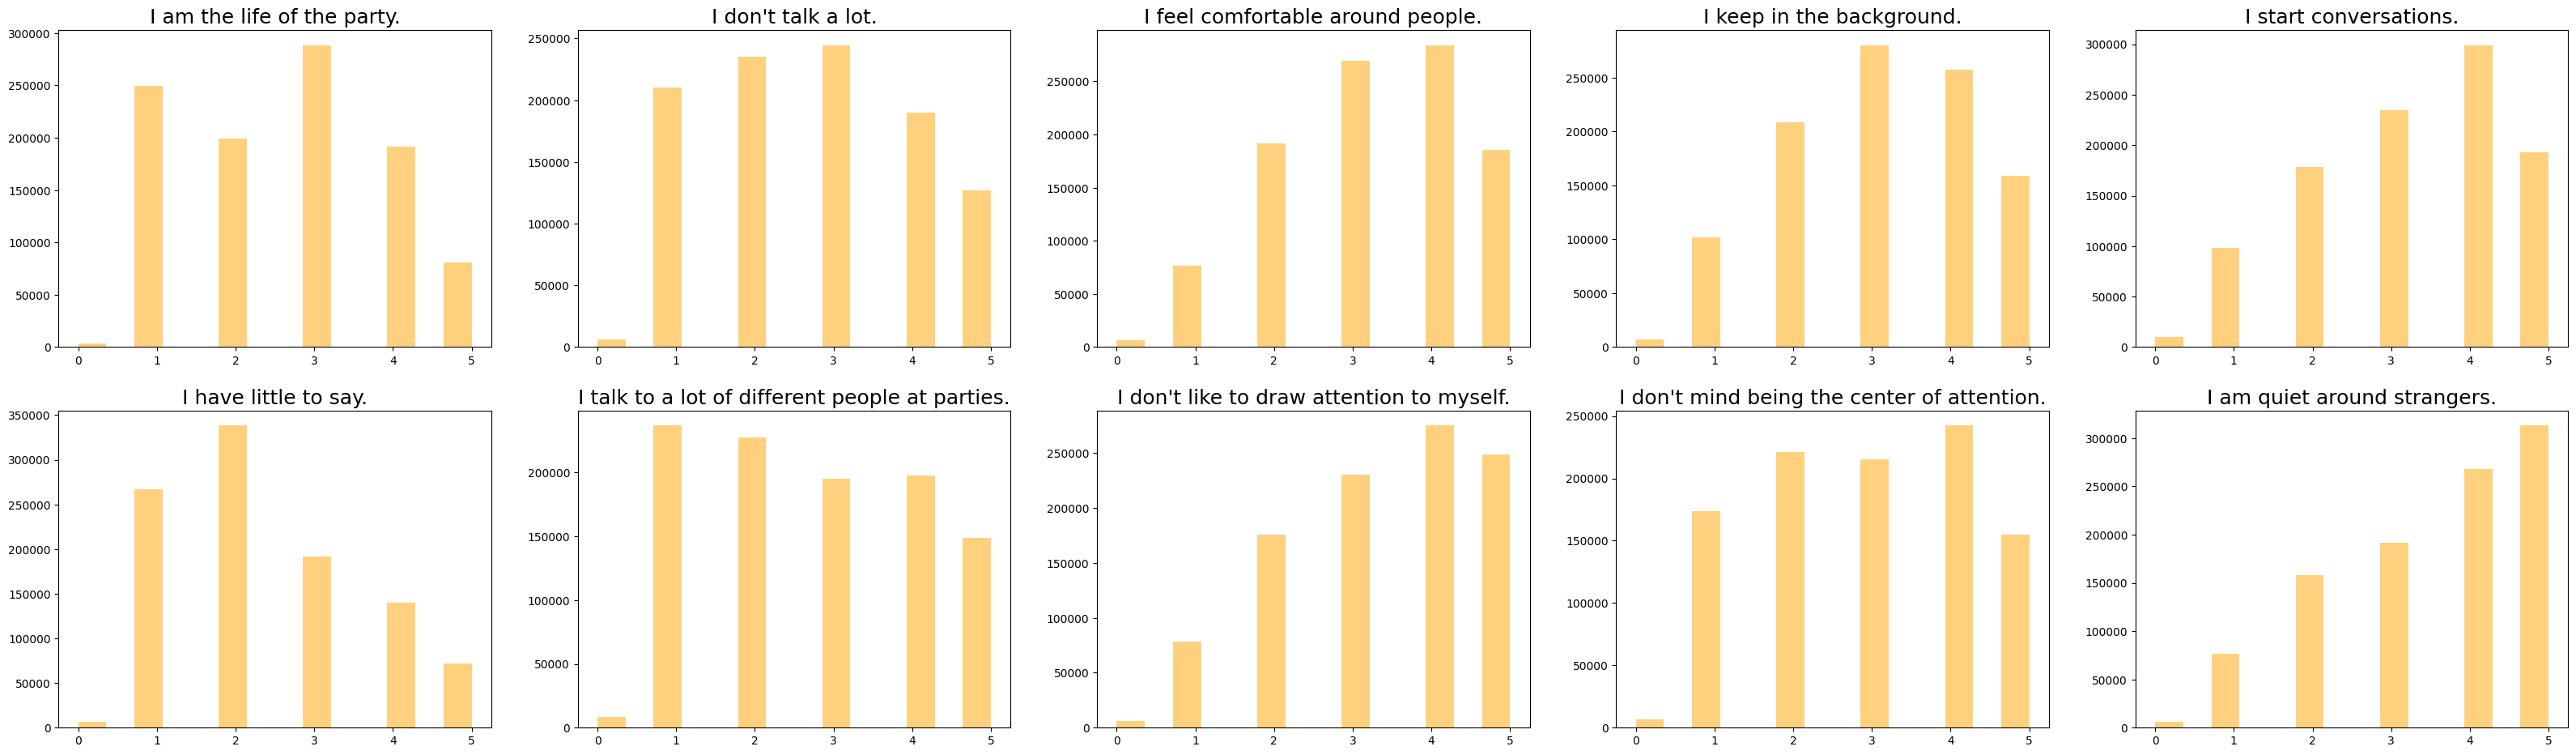

In [10]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, questions_dict, 'orange')

Q&As Related to Neuroticism Personality


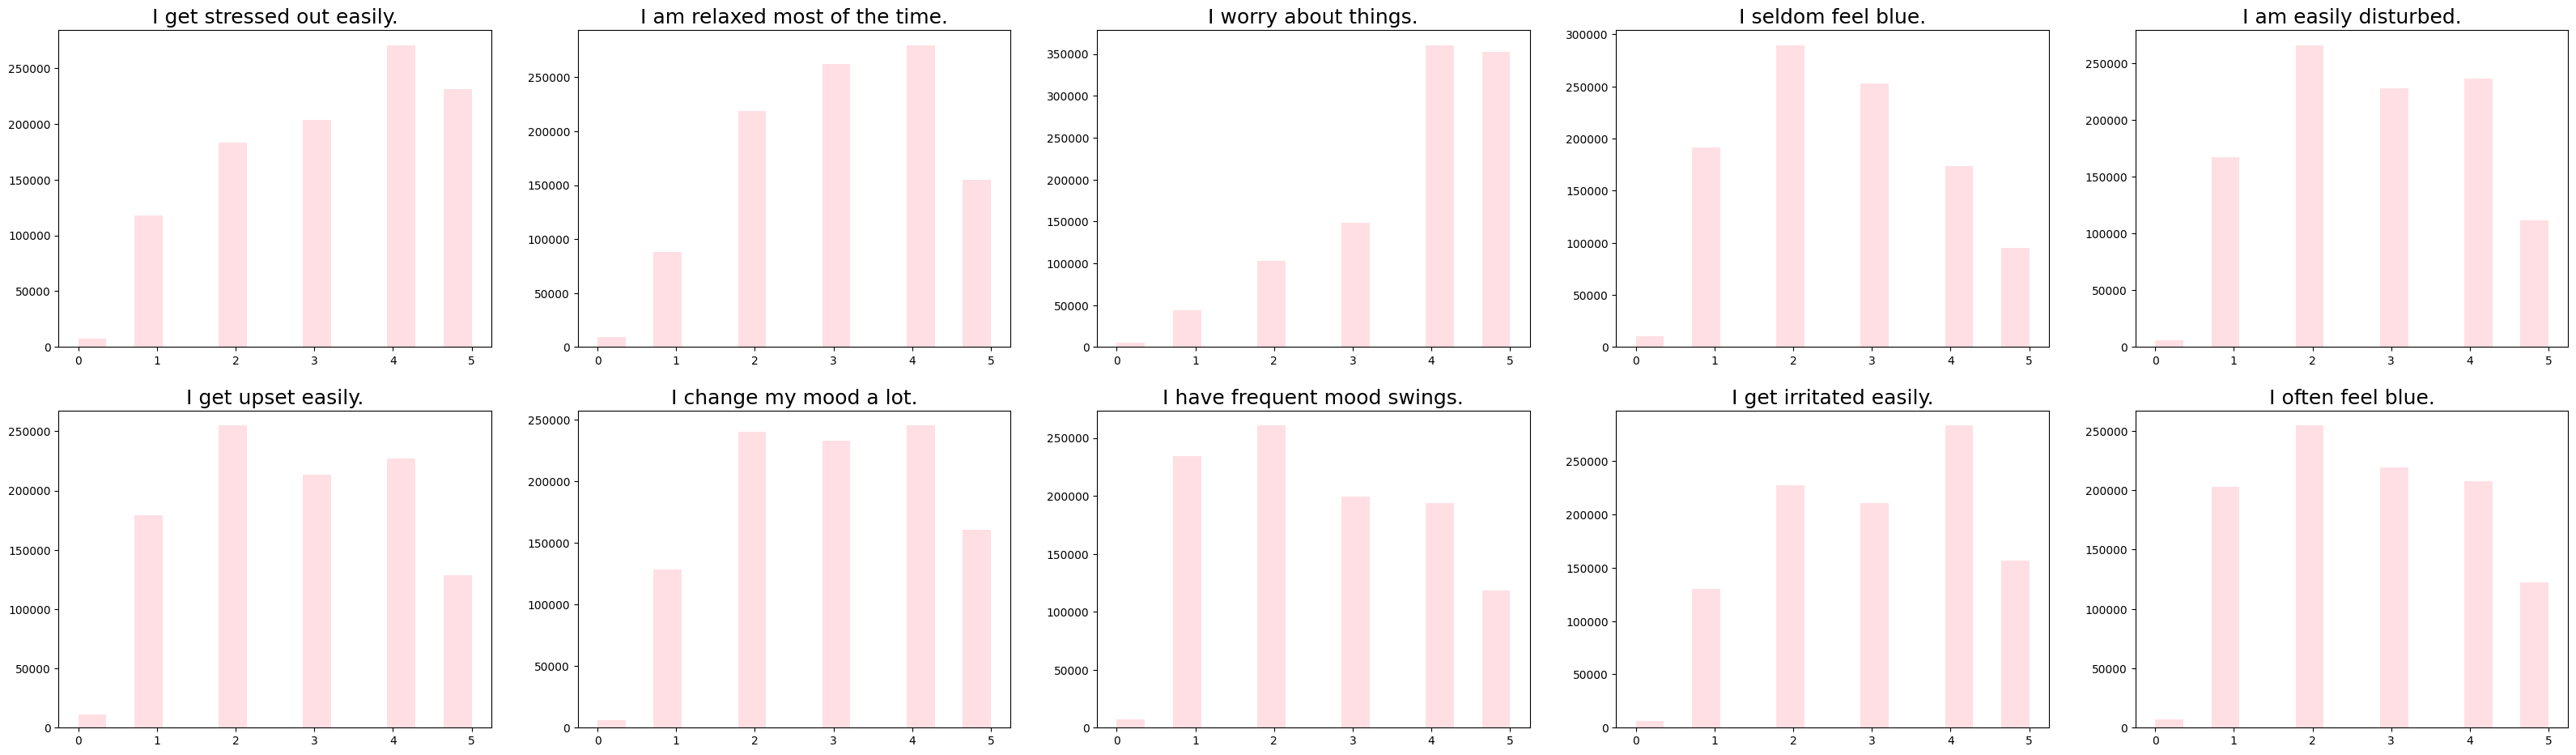

In [11]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, questions_dict, 'pink')

Q&As Related to Agreeable Personality


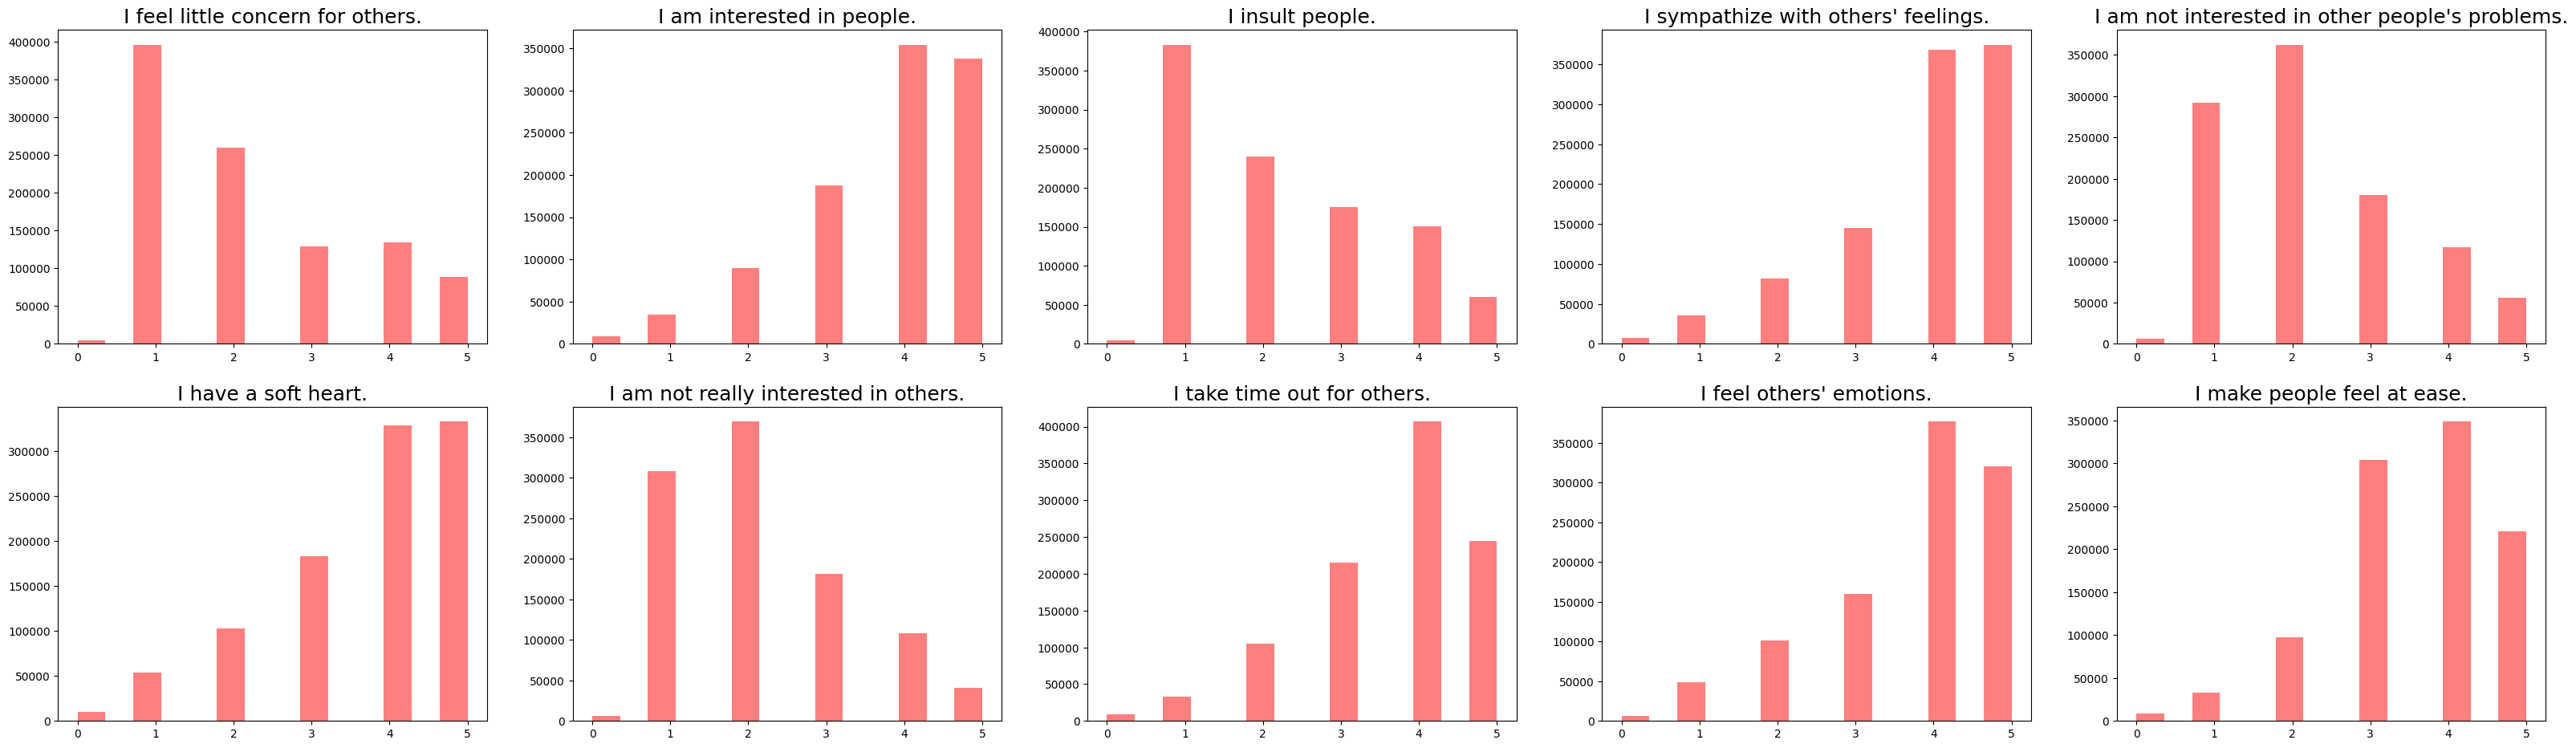

In [12]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, questions_dict, 'red')

Q&As Related to Conscientious Personality


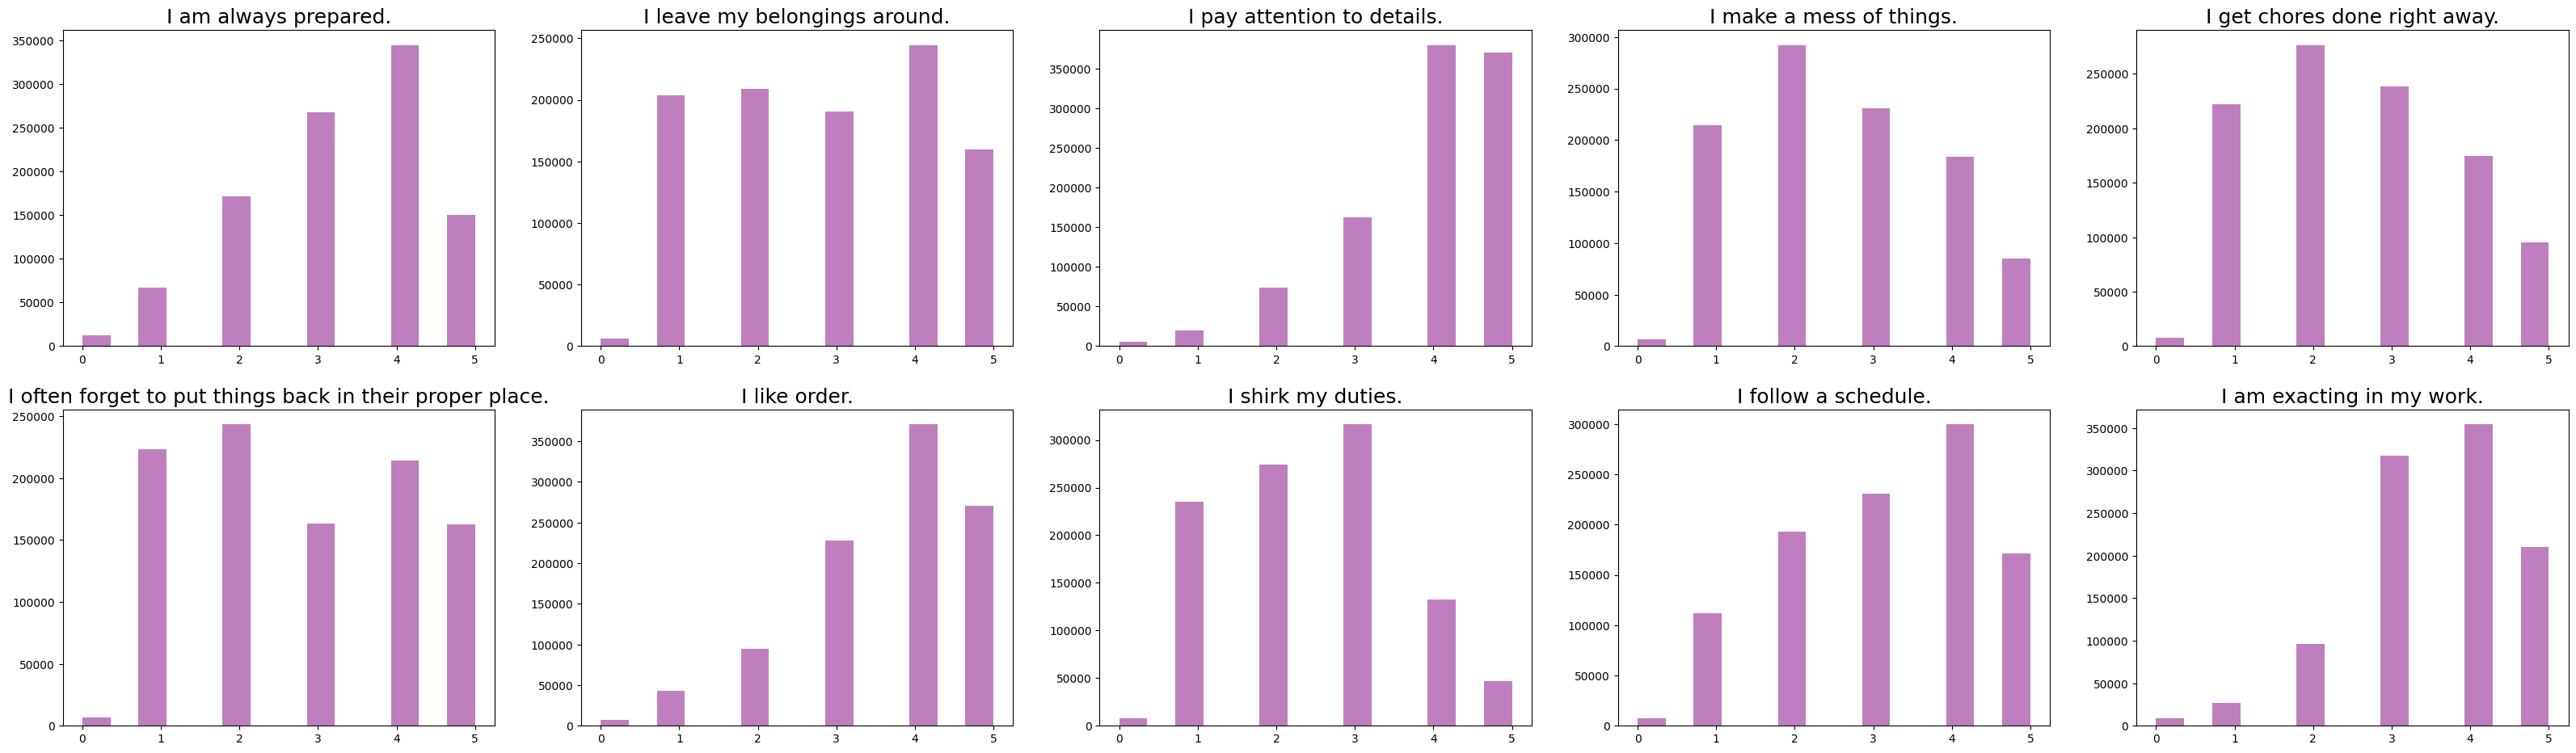

In [13]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, questions_dict, 'purple')

Q&As Related to Open Personality


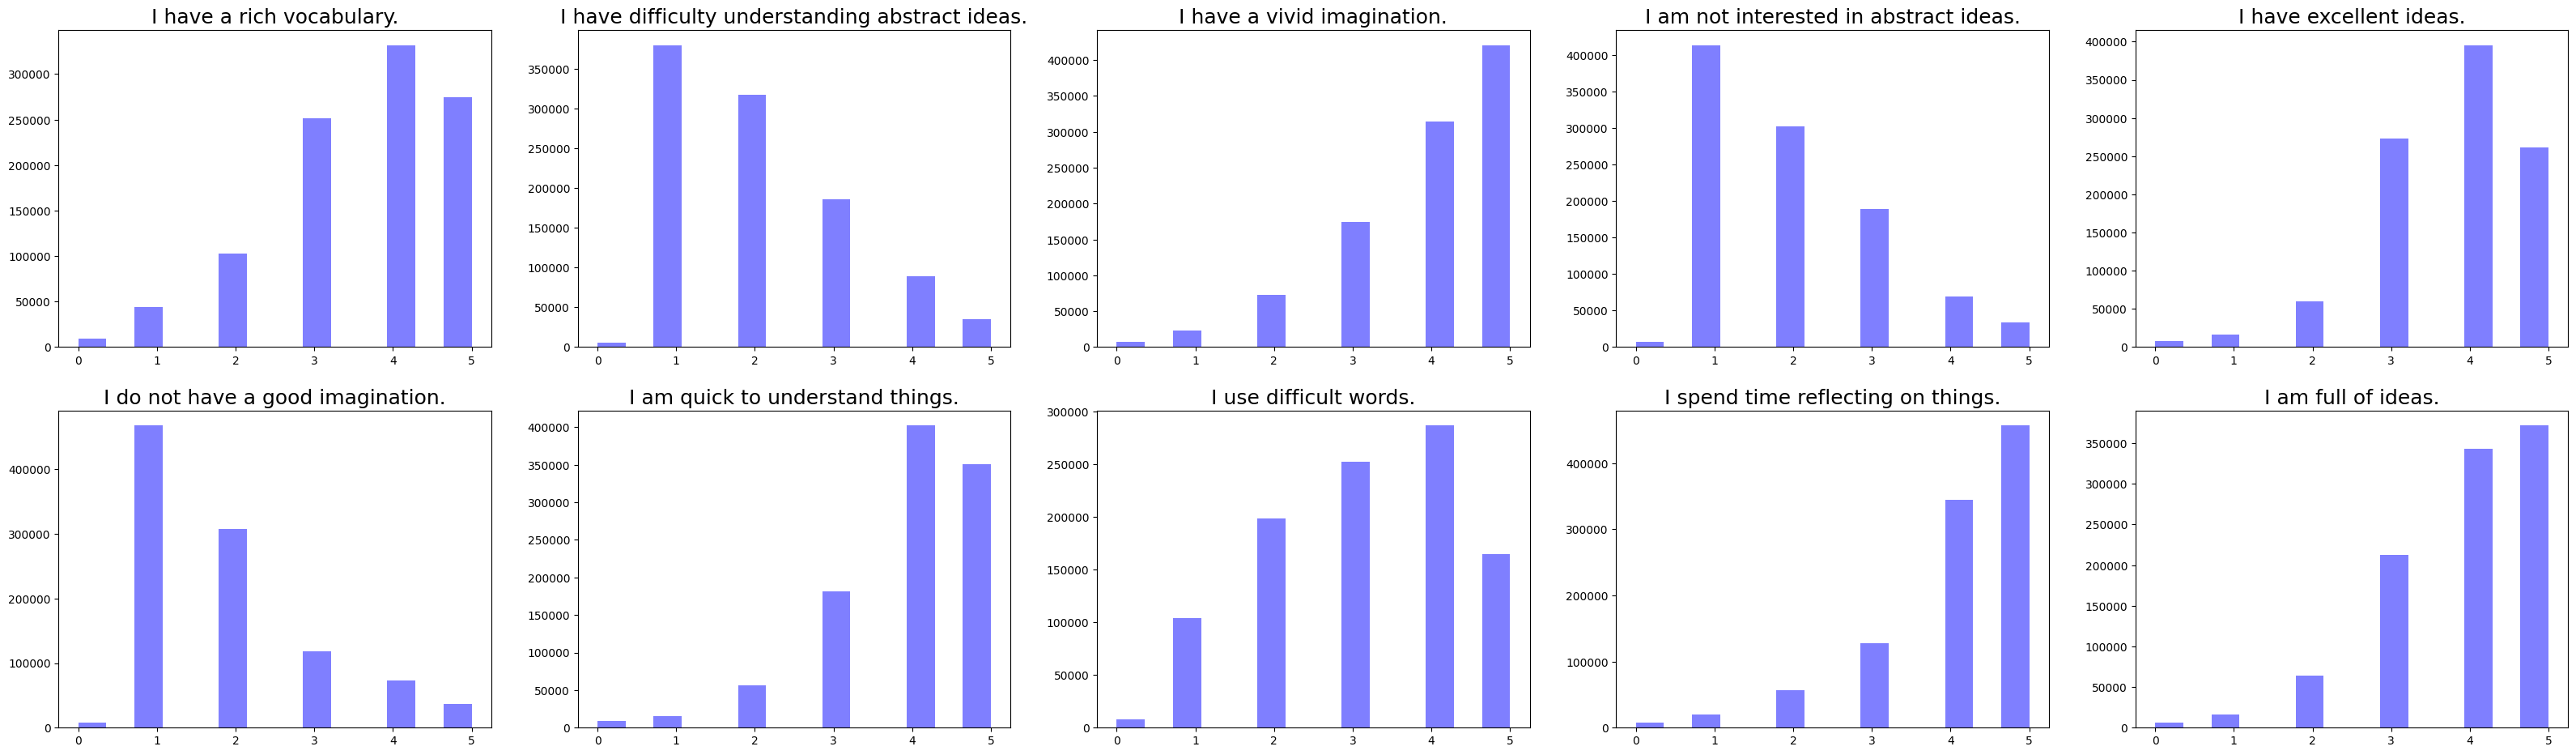

In [14]:
print('Q&As Related to Open Personality')
vis_questions(OPN, questions_dict, 'blue')

In [15]:
def calculate_scores_with_weights(df):
    trait_mapping = {
        'EXT': 'Extraversion',
        'EST': 'Emotional Stability',
        'AGR': 'Agreeableness',
        'CSN': 'Conscientiousness',
        'OPN': 'Openness'
    }

    # Define weights for questions (adjust as needed)
    question_weights = {
        'EXT1': 1, 'EXT2': -1, 'EXT3': 1, 'EXT4': -1, 'EXT5': 1,
        'EXT6': -1, 'EXT7': 1, 'EXT8': -1, 'EXT9': 1, 'EXT10': -1,
        'EST1': -1, 'EST2': 4, 'EST3': -1, 'EST4': 4, 'EST5': -1,
        'EST6': -1, 'EST7': -1, 'EST8': -1, 'EST9': -1, 'EST10': -1,
        'AGR1': -1.5, 'AGR2': 1, 'AGR3': -1.5, 'AGR4': 1, 'AGR5': -1.5,
        'AGR6': 1, 'AGR7': -1.5, 'AGR8': 1, 'AGR9': 1, 'AGR10': 1,
        'CSN1': 1, 'CSN2': -1.5, 'CSN3': 1, 'CSN4': -1.5, 'CSN5': 1,
        'CSN6': -1.5, 'CSN7': 1, 'CSN8': -1.5, 'CSN9': 1, 'CSN10': 1,
        'OPN1': 1, 'OPN2': -1.5, 'OPN3': 1, 'OPN4': -1.5, 'OPN5': 1,
        'OPN6': -1.5, 'OPN7': 1, 'OPN8': -1.5, 'OPN9': 1, 'OPN10': 1,
    }

    # trait_sums = {'EXT': 0, 'EST': 0, 'AGR': 0, 'CSN': 0, 'OPN': 0}

    # for code, weight in question_weights.items():
    #     trait_code = code[:3]  
    #     trait_sums[trait_code] += weight

    # print(trait_sums)


    trait_scores = {trait: 0 for trait in trait_mapping.values()}
    trait_counts = {trait: 0 for trait in trait_mapping.values()}

    for col, weight in question_weights.items():
        for trait_code, trait_name in trait_mapping.items():
            if col.startswith(trait_code):
                trait_scores[trait_name] += df[col].mean() * weight
                trait_counts[trait_name] += abs(weight)  # Use absolute value for counts

    trait_averages = {trait: trait_scores[trait] / trait_counts[trait] if trait_counts[trait] > 0 else 0 for trait in trait_scores}
    return trait_averages

questions['Cluster'] = kmeans.labels_

# Function to calculate scores for each cluster
def calculate_scores_for_cluster(df, cluster_label):
    cluster_df = df[df['Cluster'] == cluster_label].drop(columns='Cluster')
    return calculate_scores_with_weights(cluster_df)

# Calculate scores for each cluster
cluster_trait_scores = {}

for cluster_label in range(5):
    cluster_scores = calculate_scores_for_cluster(questions, cluster_label)
    cluster_trait_scores[f"Cluster {cluster_label + 1}"] = {}
    for trait, score in cluster_scores.items():
        cluster_trait_scores[f"Cluster {cluster_label + 1}"][trait] = score
                 

print(cluster_trait_scores)

{'Cluster 1': {'Extraversion': 0.667856647129674, 'Emotional Stability': -0.4520044260467365, 'Agreeableness': 0.8982845057767707, 'Conscientiousness': -0.11613410078342001, 'Openness': 0.8618666335328822}, 'Cluster 2': {'Extraversion': -0.4700413590269905, 'Emotional Stability': 0.49142949051806023, 'Agreeableness': -0.0369134421943772, 'Conscientiousness': 0.2894547246305771, 'Openness': 0.6576749078357486}, 'Cluster 3': {'Extraversion': -0.9256396126095787, 'Emotional Stability': -0.8315809044892795, 'Agreeableness': 0.42053827470430355, 'Conscientiousness': -0.16164952188510961, 'Openness': 0.662206557198597}, 'Cluster 4': {'Extraversion': -0.49591063015312126, 'Emotional Stability': -0.15810851691328037, 'Agreeableness': 1.0869142542083825, 'Conscientiousness': 0.8706514787617784, 'Openness': 0.8189789764919512}, 'Cluster 5': {'Extraversion': 0.8472509827034903, 'Emotional Stability': 0.6895060145630392, 'Agreeableness': 1.184984940388069, 'Conscientiousness': 0.7851839562149712, 

5


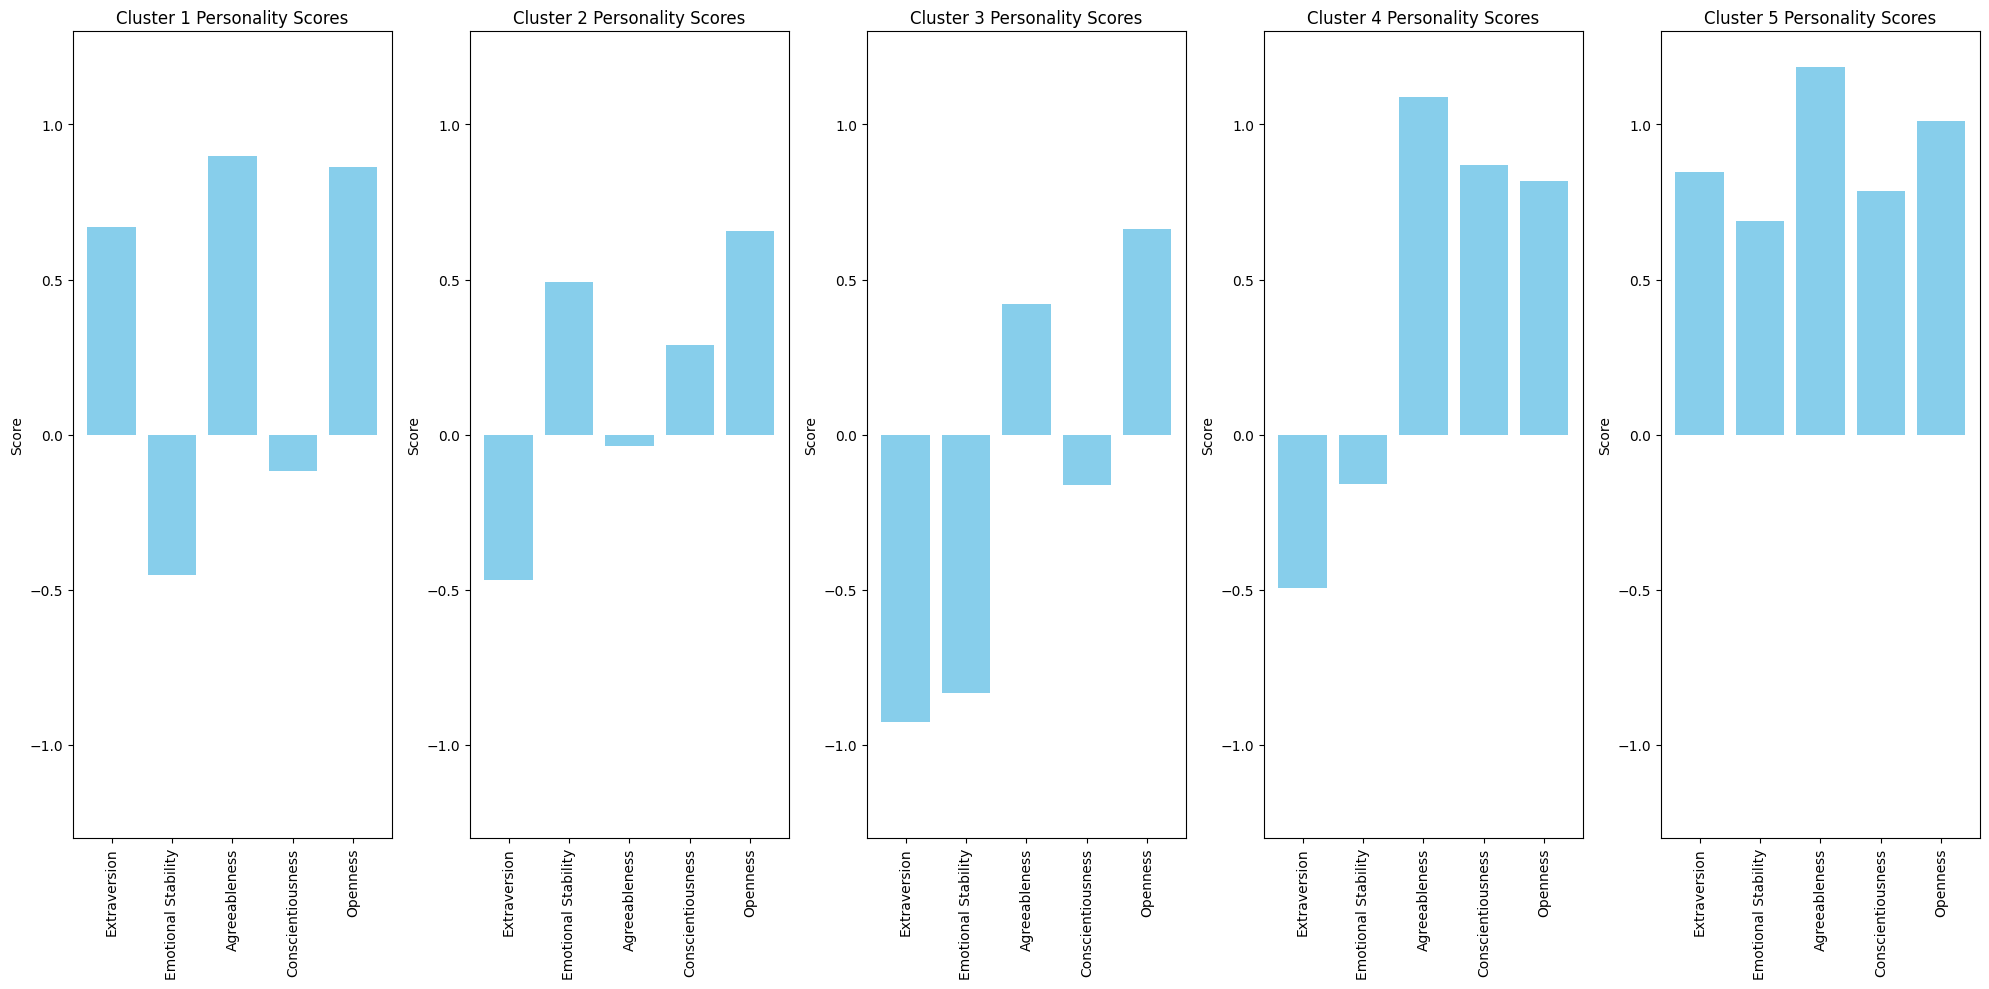

In [16]:
def plot_cluster_personality_subplots(cluster_trait_scores):
    # Extract trait names for consistent x-axis
    trait_names = list(cluster_trait_scores.values())[0].keys()

    # Number of clusters
    num_clusters = len(cluster_trait_scores)
    print(num_clusters)

    # Set up subplots
    num_rows = 5//num_clusters
    num_cols = 5
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))

    # Flatten the axes for easy indexing
    axes = axes.flatten()

    # Plot bar plots for each cluster
    for i, (cluster_name, trait_scores) in enumerate(cluster_trait_scores.items(), 1):
        ax = axes[i - 1]
        ax.bar(trait_names, trait_scores.values(), color='skyblue')
        ax.set_title(f'{cluster_name} Personality Scores')
        ax.set_ylabel('Score')
        ax.tick_params(axis='x', rotation=90)
        
        # Set y-axis limits
        ax.set_ylim(-1.3, 1.3)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
plot_cluster_personality_subplots(cluster_trait_scores)


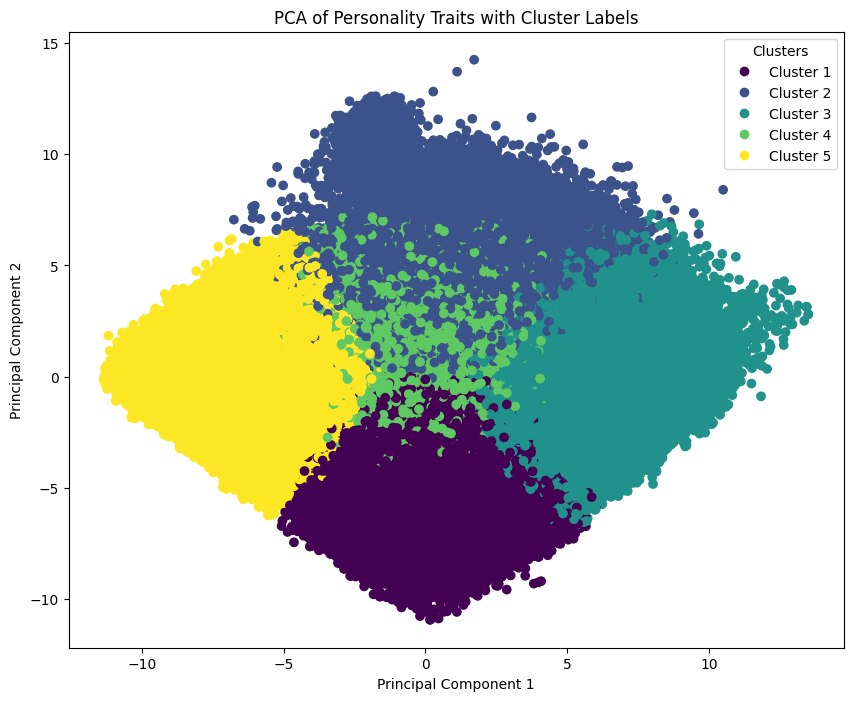

In [17]:
# Fit PCA to your data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(questions)

# Add the cluster labels to the PCA result
pca_result_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_result_df['Cluster'] = kmeans.labels_

# Plot the PCA result with cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result_df['PC1'], pca_result_df['PC2'], c=pca_result_df['Cluster'], cmap='viridis')
plt.title('PCA of Personality Traits with Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend
legend_labels = [f'Cluster {i}' for i in range(1, 11)]
plt.legend(handles=scatter.legend_elements()[0], title='Clusters', labels=legend_labels)

plt.show()
